In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv(r'/content/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [10]:
print(df[['director', 'cast', 'country', 'date_added', 'rating', 'duration']].isnull().sum())

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [11]:
df['country'] = df['country'].fillna('Unknown')

In [12]:
df['director'] = df['director'].fillna('Not Available')

In [13]:
df['cast'] = df['cast'].fillna('Not Available')

In [14]:
df = df.dropna(subset=['rating', 'duration'])

# Countplot for type (Movie vs TV Show)

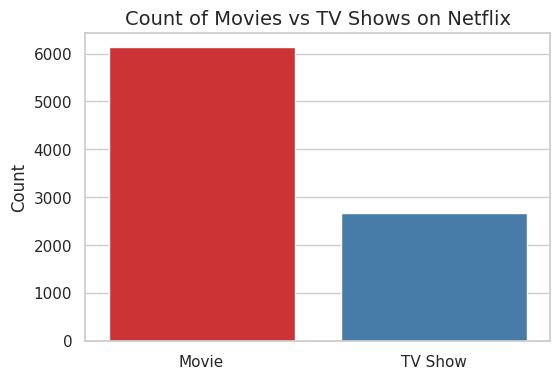

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set1', legend=False)
plt.title('Count of Movies vs TV Shows on Netflix', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Top 10 Countries by Content

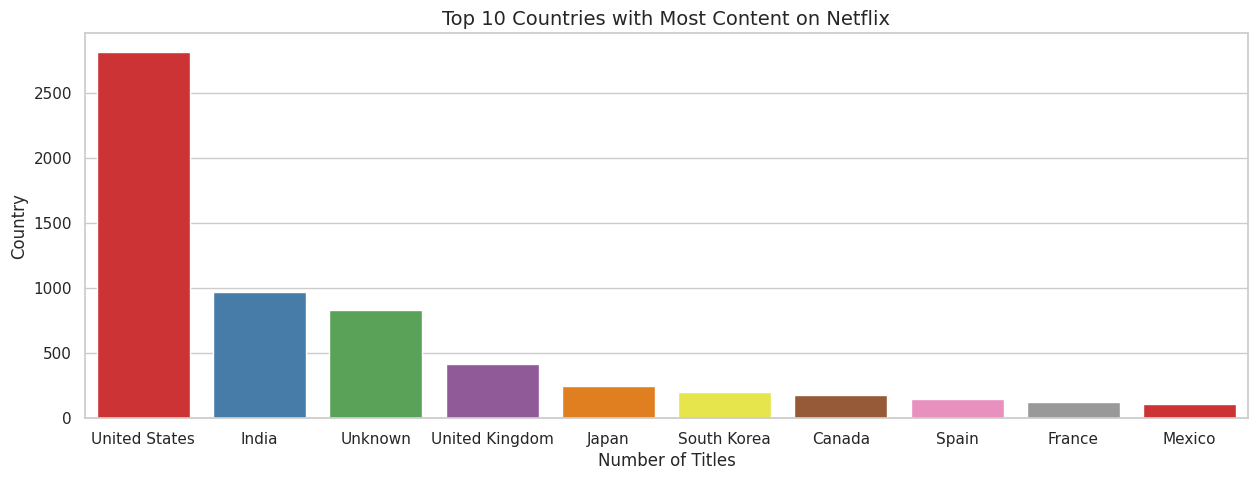

In [83]:
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'count']

plt.figure(figsize=(15,5))
sns.barplot(data=top_countries_df, y='count', x='country', hue='country', palette='Set1', legend=False)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


# Trend of Netflix Content Over the Years

In [31]:
df['year_added'] = df['date_added'].dt.year

In [84]:
year_counts = df['year_added'].value_counts().sort_index()

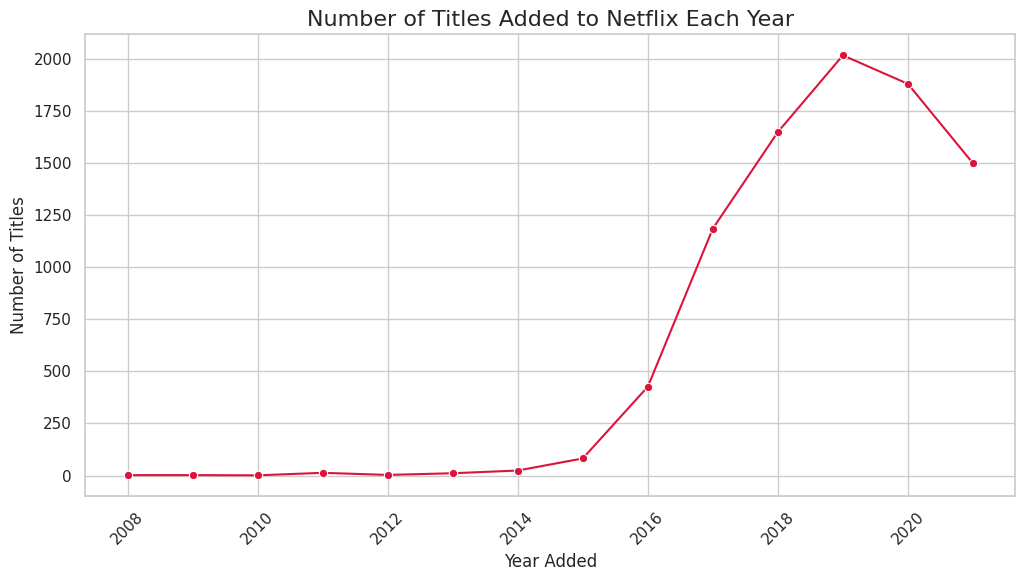

In [90]:
plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='crimson')
plt.title('Number of Titles Added to Netflix Each Year', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Separate Movies and TV Shows

In [33]:
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

movies_df['duration_int'] = movies_df['duration'].str.extract('(\d+)').astype(int)

tv_df['duration_int'] = tv_df['duration'].str.extract('(\d+)').astype(int)


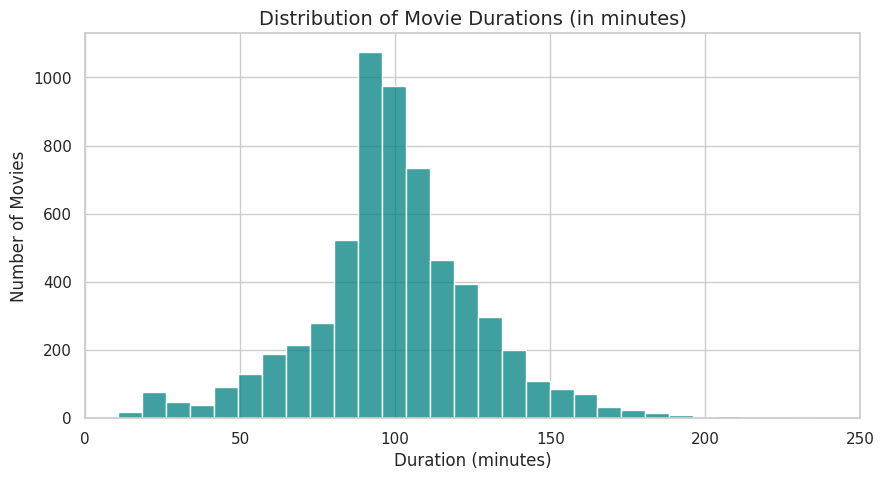

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(data=movies_df, x='duration_int', bins=40, color='teal')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=14)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xlim(0, 250)
plt.grid(True)
plt.show()

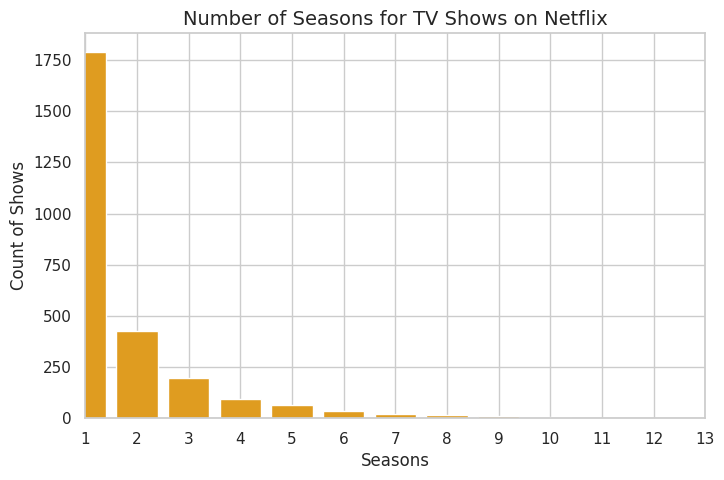

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(data=tv_df, x='duration_int', color='orange')
plt.title('Number of Seasons for TV Shows on Netflix', fontsize=14)
plt.xlabel('Seasons')
plt.ylabel('Count of Shows')
plt.xlim(0, 12)
plt.grid(True)
plt.show()

# Most Common Genres on Netflix

In [41]:
genre_list = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]

In [42]:
genre_counts = Counter(flat_genres)
top_genres = genre_counts.most_common(15)

In [43]:
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

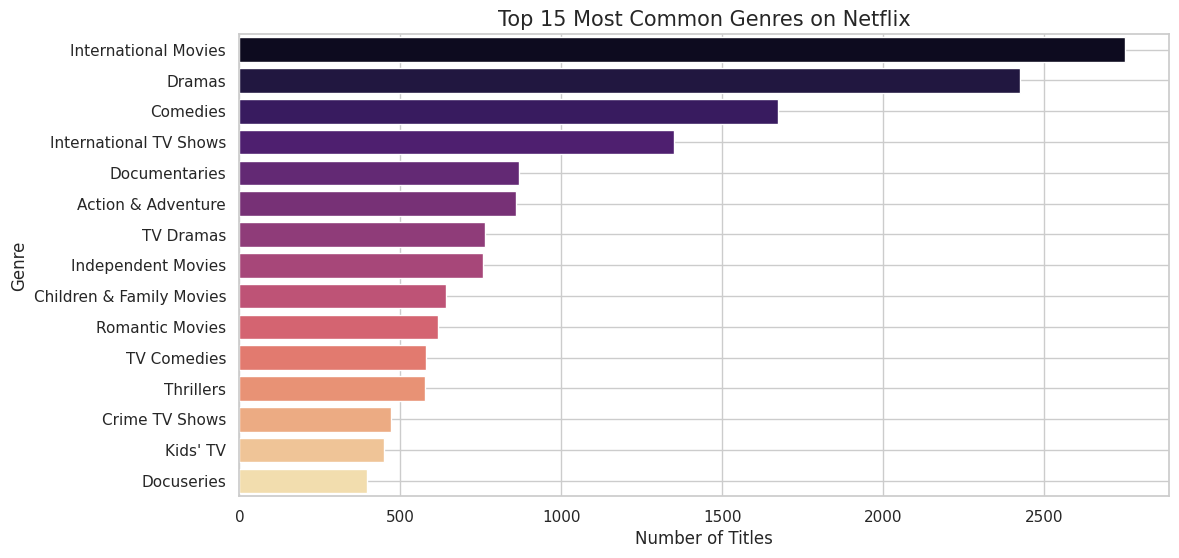

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x='Count', y='Genre', hue='Genre', palette='magma', legend=False)
plt.title('Top 15 Most Common Genres on Netflix', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

# Top 10 Actors and Their Rating Distribution

In [49]:
cast_series = df['cast'].dropna().str.split(', ')

In [50]:
from collections import Counter
actor_counts = Counter(actor for cast in cast_series for actor in cast)
top_actors = [actor for actor, count in actor_counts.most_common(10)]

In [51]:
df['cast_list'] = df['cast'].fillna('').str.split(', ')

In [52]:
df_expanded = df.explode('cast_list')

In [53]:
actor_rating_df = df_expanded[df_expanded['cast_list'].isin(top_actors)]

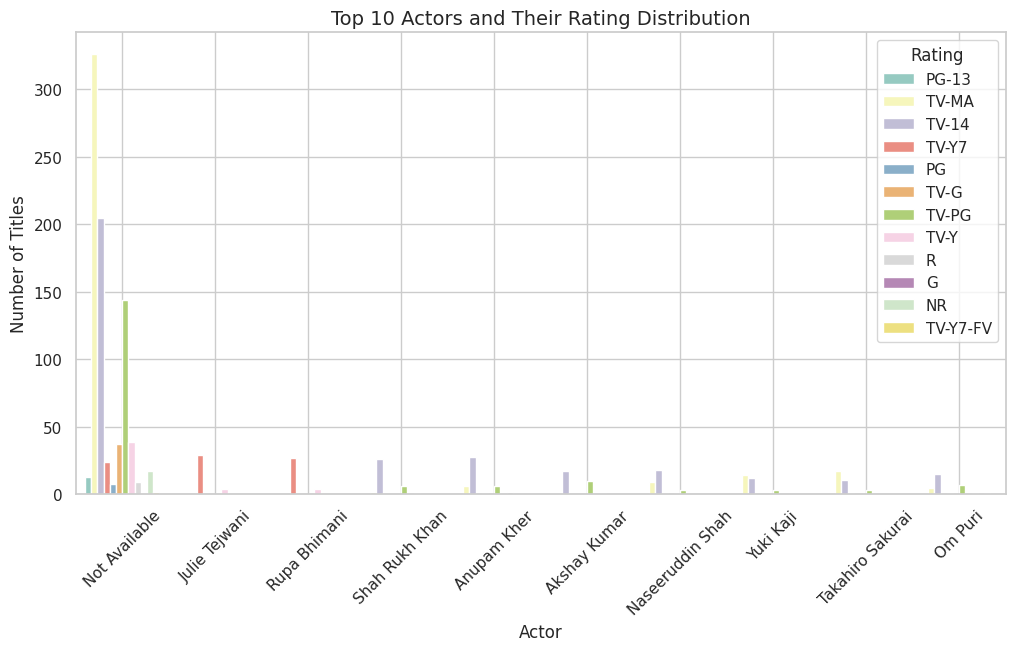

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data=actor_rating_df, x='cast_list', hue='rating', palette='Set3')
plt.title('Top 10 Actors and Their Rating Distribution', fontsize=14)
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.grid(True)
plt.show()

# Content Rating vs Content Type

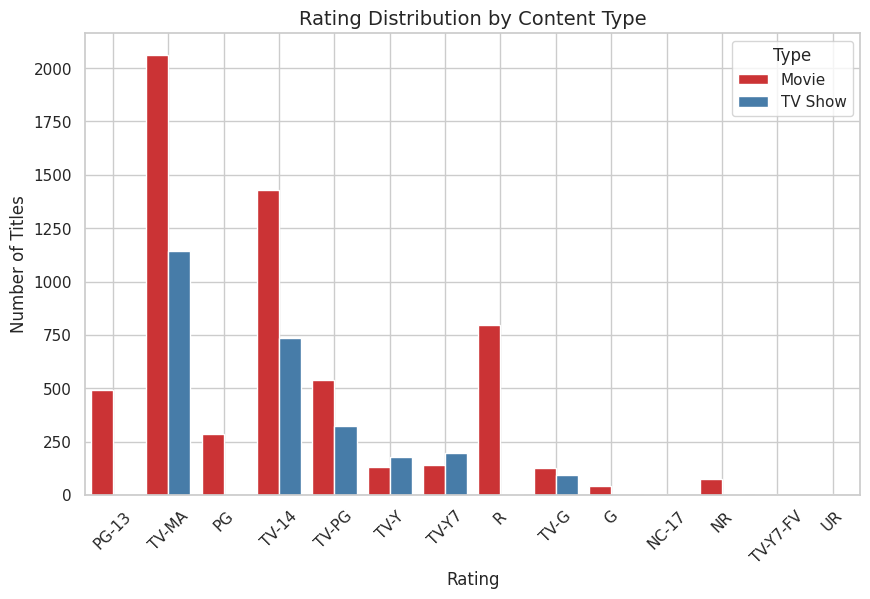

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', hue='type', palette='Set1')
plt.title('Rating Distribution by Content Type', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Type')
plt.show()


# Monthly Trends of Content Additions

In [56]:
months_order = pd.date_range(start='2023-01-01', periods=12, freq='MS').strftime('%B')

/tmp/ipython-input-58-1363201824.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.countplot(data=df, x='month_added', order=pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B'), palette='cubehelix')
/tmp/ipython-input-58-1363201824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', order=pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B'), palette='cubehelix')


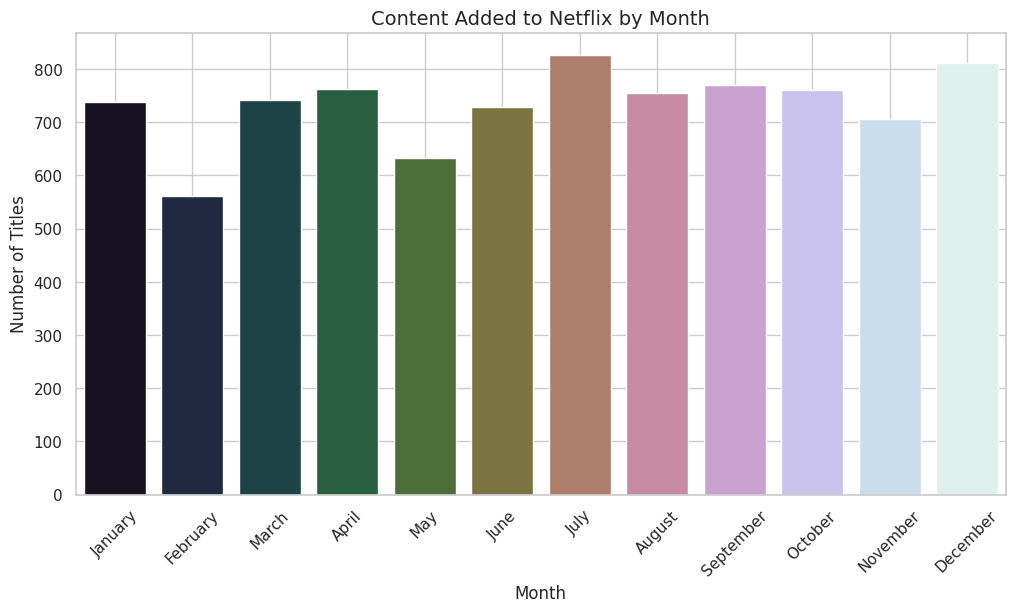

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month_added', order=pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B'), palette='cubehelix')
plt.title('Content Added to Netflix by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Most Common Combinations of Genres

In [60]:
genre_pairs = []

In [61]:
for genres in df['listed_in'].dropna().str.split(', '):
    genre_pairs.extend(combinations(sorted(genres), 2))

In [62]:
genre_pair_counts = Counter(genre_pairs).most_common(15)

In [63]:
genre_pair_df = pd.DataFrame(genre_pair_counts, columns=['Genre Pair', 'Count'])
genre_pair_df['Genres'] = genre_pair_df['Genre Pair'].apply(lambda x: ' & '.join(x))

/tmp/ipython-input-107-1405130200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_pair_df, x='Count', y='Genres', palette='magma')


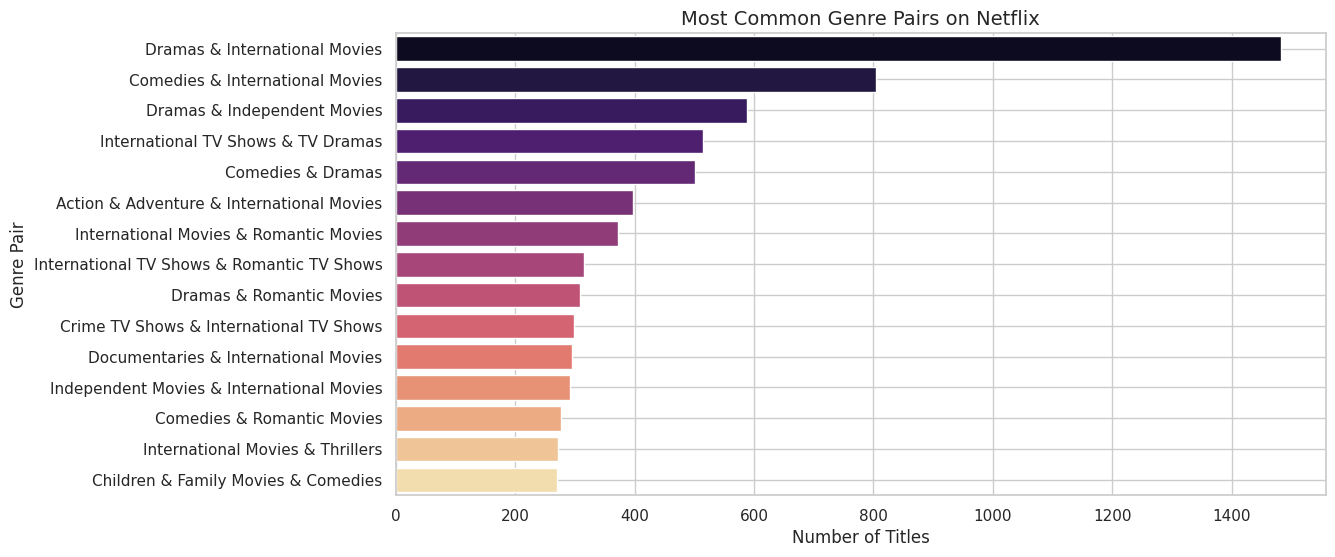

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(data=genre_pair_df, x='Count', y='Genres', palette='magma')
plt.title('Most Common Genre Pairs on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre Pair')
plt.grid(True)
plt.show()

# Compare TV Shows vs Movies Duration Summary

In [65]:
movies_df['duration_type'] = 'Movie (min)'
tv_df['duration_type'] = 'TV Show (seasons)'

In [66]:
combined_duration_df = pd.concat([
    movies_df[['duration_int', 'duration_type']],
    tv_df[['duration_int', 'duration_type']]
])

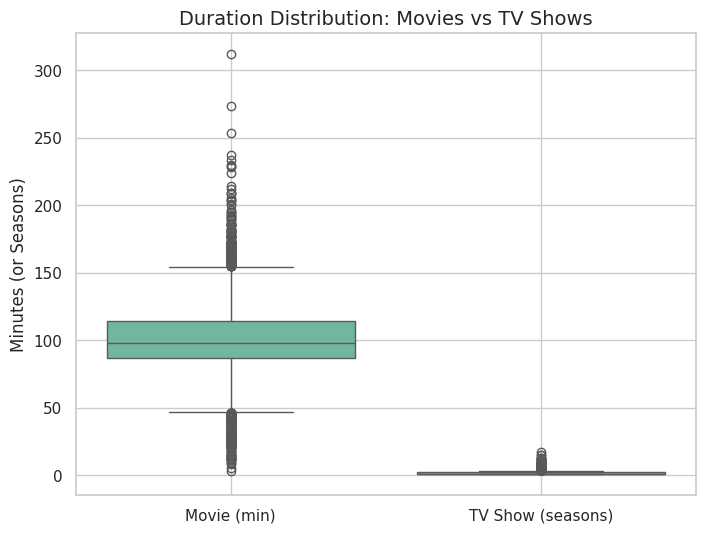

In [68]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=combined_duration_df,
    x='duration_type',
    y='duration_int',
    hue='duration_type',
    palette='Set2',
    legend=False
)

plt.title('Duration Distribution: Movies vs TV Shows', fontsize=14)
plt.xlabel('')
plt.ylabel('Minutes (or Seasons)')
plt.grid(True)
plt.show()
